
# 3x3 엣지 필터 (OpenCV)

이 노트북은 **3x3 Prewitt 엣지 필터**를 **진짜 컨볼루션(convolution)** 방식으로만 적용하여  
수직/수평 엣지를 검출하는 실습 (`cv2.filter2D`)


In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_img(title, img, cmap=None):
    plt.figure()
    if img.ndim == 2:
        plt.imshow(img, cmap=cmap if cmap is not None else 'gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

def to_u8_abs(m):
    m = np.abs(m.astype(np.float32))
    if m.max() > 0:
        m = m / m.max()
    return (m * 255).astype(np.uint8)

def apply_convolution(img, kernel):
    # 진짜 컨볼루션: 커널을 180도 회전(상하/좌우 뒤집기) 후 filter2D 적용
    k_flipped = cv2.flip(kernel, -1)
    f = cv2.filter2D(img.astype(np.float32), ddepth=cv2.CV_32F, kernel=k_flipped, borderType=cv2.BORDER_DEFAULT)
    return to_u8_abs(f)


In [2]:
# matplotlib 폰트 깨짐 현상 해결
import matplotlib.font_manager as fm
fm.fontManager.ttflist
[f.name for f in fm.fontManager.ttflist]

import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumGothic'


## 1) 3x3 Prewitt 커널 (수직/수평)

- 수직 엣지(=x방향 변화) 검출 커널 \(K_x\)
\[
K_x = \begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}
\]

- 수평 엣지(=y방향 변화) 검출 커널 \(K_y\)
\[
K_y = \begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}
\]


In [3]:

Kx = np.array([[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]], dtype=np.float32)

Ky = np.array([[-1, -1, -1],
               [ 0,  0,  0],
               [ 1,  1,  1]], dtype=np.float32)

print("Kx (수직 엣지, Prewitt):\n", Kx)
print("Ky (수평 엣지, Prewitt):\n", Ky)


Kx (수직 엣지, Prewitt):
 [[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
Ky (수평 엣지, Prewitt):
 [[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]



## 2) 합성 이미지로 직관 확인

- **세로 줄무늬**: \(K_x\) 반응이 큼  
- **가로 줄무늬**: \(K_y\) 반응이 큼


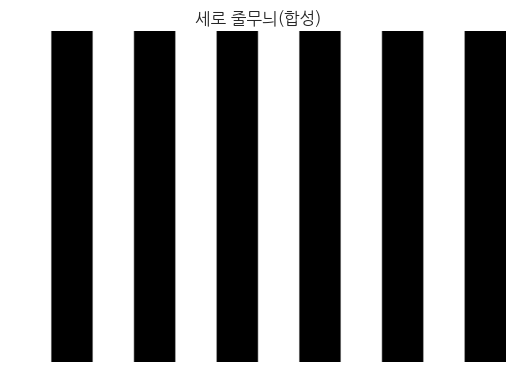

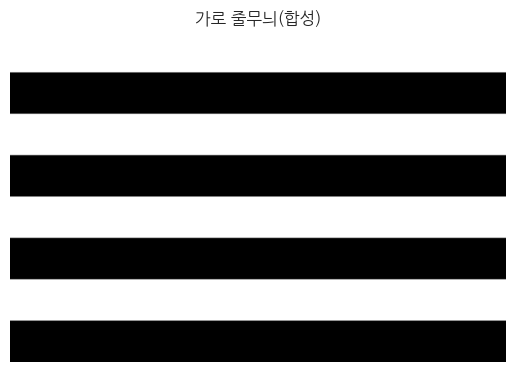

In [4]:

h, w = 160, 240

# 세로 줄무늬
vertical_stripes = np.zeros((h, w), dtype=np.uint8)
stripe_w = 20
for i in range(0, w, stripe_w*2):
    vertical_stripes[:, i:i+stripe_w] = 255

# 가로 줄무늬
horizontal_stripes = np.zeros((h, w), dtype=np.uint8)
stripe_h = 20
for j in range(0, h, stripe_h*2):
    horizontal_stripes[j:j+stripe_h, :] = 255

show_img("세로 줄무늬(합성)", vertical_stripes)
show_img("가로 줄무늬(합성)", horizontal_stripes)



## 3) Convolution만 적용 (`filter2D` + 커널 180도 회전)

각 이미지에 대해 \(K_x\), \(K_y\) 컨볼루션 결과를 시각화합니다.


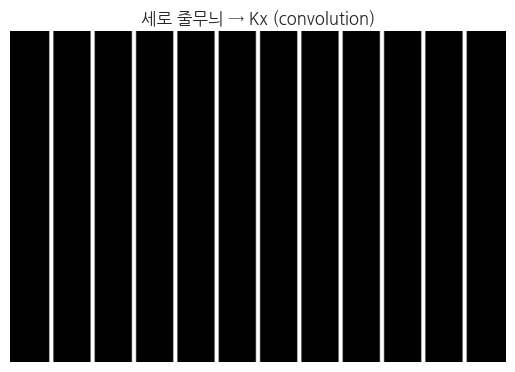

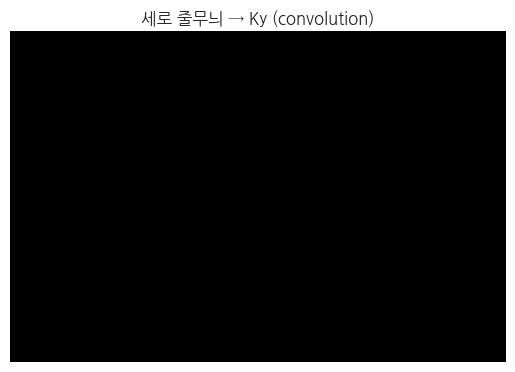

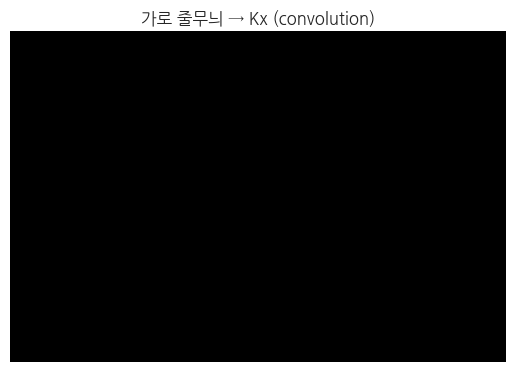

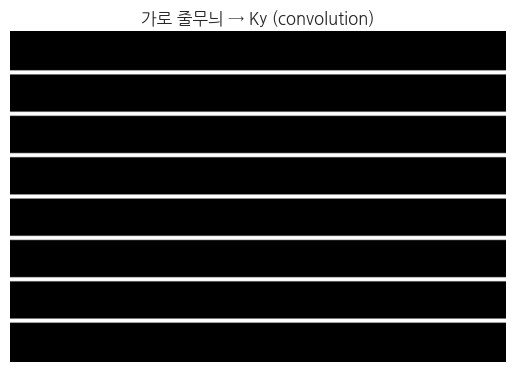

In [5]:

# 세로 줄무늬
vx = apply_convolution(vertical_stripes, Kx)
vy = apply_convolution(vertical_stripes, Ky)
show_img("세로 줄무늬 → Kx (convolution)", vx)
show_img("세로 줄무늬 → Ky (convolution)", vy)

# 가로 줄무늬
hx = apply_convolution(horizontal_stripes, Kx)
hy = apply_convolution(horizontal_stripes, Ky)
show_img("가로 줄무늬 → Kx (convolution)", hx)
show_img("가로 줄무늬 → Ky (convolution)", hy)



## 4) 도형 장면에서 결과 확인

사각형/수직선/수평선/원 등을 그려 다양한 방향의 엣지를 확인합니다.


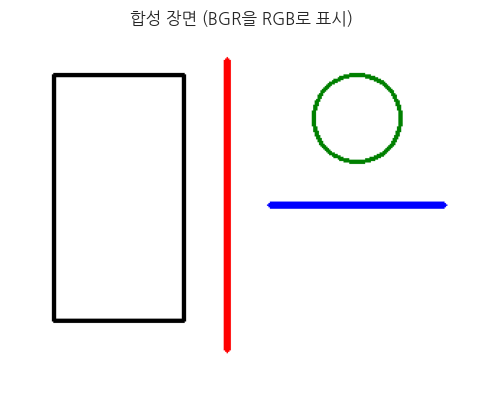

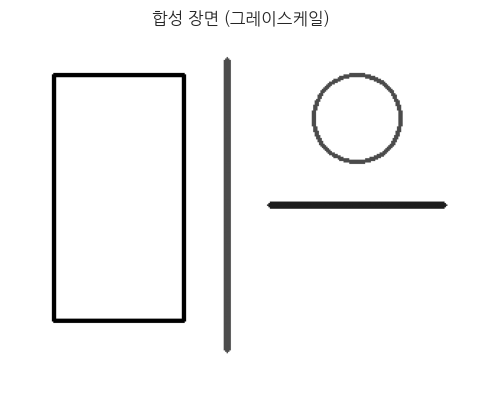

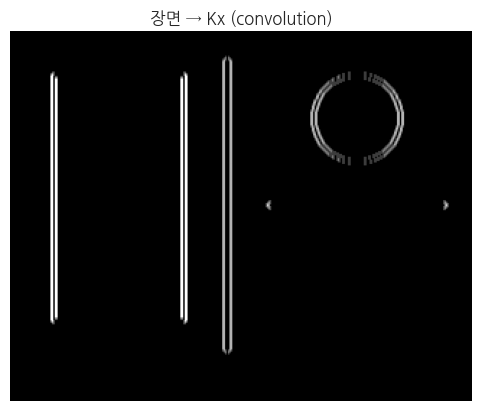

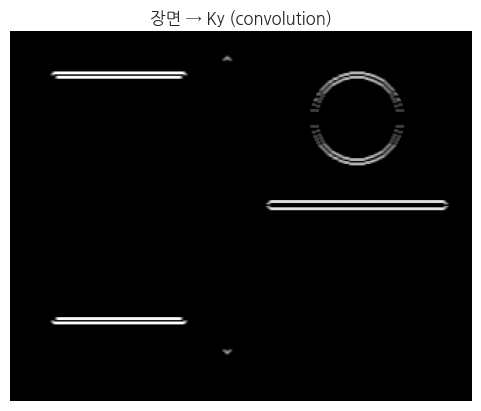

In [9]:

H, W = 256, 320
scene = np.full((H, W, 3), 255, dtype=np.uint8)

cv2.rectangle(scene, (30, 30), (120, 200), (0, 0, 0), 2)   # 수직/수평 엣지
cv2.line(scene, (150, 20), (150, 220), (0, 0, 255), 3)     # 수직 빨간선
cv2.line(scene, (180, 120), (300, 120), (255, 0, 0), 3)    # 수평 파란선
cv2.circle(scene, (240, 60), 30, (0, 128, 0), 2)           # 곡선 엣지

gray = cv2.cvtColor(scene, cv2.COLOR_BGR2GRAY)
show_img("합성 장면 (BGR을 RGB로 표시)", scene)
show_img("합성 장면 (그레이스케일)", gray)

sx = apply_convolution(gray, Kx)
sy = apply_convolution(gray, Ky)
show_img("장면 → Kx (convolution)", sx)
show_img("장면 → Ky (convolution)", sy)
